In [1]:
# Import our dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Import our first input dataset
health_df = pd.read_csv("PLACES__County_Data__GIS_Friendly_Format___2023_release_20240909.csv")
health_df.shape

(3143, 154)

In [3]:
# Remove Rows with missing data
health_df_cleaned = health_df.dropna()
health_df_cleaned.shape

(3076, 154)

In [4]:
health_df_cleaned.tail()

,StateAbbr,StateDesc,CountyName,CountyFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ACCESS2_AdjPrev,ACCESS2_Adj95CI,ARTHRITIS_CrudePrev,...,SELFCARE_Adj95CI,INDEPLIVE_CrudePrev,INDEPLIVE_Crude95CI,INDEPLIVE_AdjPrev,INDEPLIVE_Adj95CI,DISABILITY_CrudePrev,DISABILITY_Crude95CI,DISABILITY_AdjPrev,DISABILITY_Adj95CI,Geolocation
3138,KY,Kentucky,Carroll,21041,10863,9.5,"( 7.4, 12.0)",9.9,"( 7.8, 12.7)",32.6,...,"( 4.2, 5.7)",11.8,"(10.2, 13.7)",11.6,"( 9.9, 13.4)",44.5,"(39.2, 49.6)",42.7,"(37.5, 47.8)",POINT (-85.1240238 38.6683939)
3139,MS,Mississippi,Covington,28031,18279,13.3,"(10.6, 16.5)",13.9,"(11.1, 17.2)",30.8,...,"( 4.7, 6.0)",11.4,"(10.0, 13.1)",11.2,"( 9.7, 12.8)",40.5,"(35.8, 45.4)",38.6,"(34.0, 43.6)",POINT (-89.5488968 31.633331)
3140,NY,New York,Rensselaer,36083,160232,5.7,"( 4.3, 7.3)",6.0,"( 4.5, 7.7)",28.1,...,"( 2.5, 3.5)",7.2,"( 6.0, 8.5)",7.0,"( 5.9, 8.3)",25.5,"(22.1, 29.5)",24.1,"(20.9, 28.0)",POINT (-73.5138454 42.7104206)
3141,KS,Kansas,Russell,20167,6703,10.5,"( 8.1, 13.4)",11.2,"( 8.7, 14.3)",32.6,...,"( 3.0, 4.1)",8.2,"( 6.9, 9.6)",7.6,"( 6.5, 8.9)",32.3,"(27.6, 37.3)",28.2,"(23.8, 32.9)",POINT (-98.7709489 38.9160397)
3142,TX,Texas,Winkler,48495,7415,31.1,"(25.9, 36.7)",31.8,"(26.5, 37.4)",22.5,...,"( 4.1, 5.3)",8.9,"( 7.6, 10.1)",8.9,"( 7.7, 10.1)",34.0,"(29.2, 38.9)",33.6,"(29.0, 38.6)",POINT (-103.0549246 31.8328615)


In [5]:
columns_list = list(health_df_cleaned.columns)
print(columns_list)

['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TotalPopulation', 'ACCESS2_CrudePrev', 'ACCESS2_Crude95CI', 'ACCESS2_AdjPrev', 'ACCESS2_Adj95CI', 'ARTHRITIS_CrudePrev', 'ARTHRITIS_Crude95CI', 'ARTHRITIS_AdjPrev', 'ARTHRITIS_Adj95CI', 'BINGE_CrudePrev', 'BINGE_Crude95CI', 'BINGE_AdjPrev', 'BINGE_Adj95CI', 'BPHIGH_CrudePrev', 'BPHIGH_Crude95CI', 'BPHIGH_AdjPrev', 'BPHIGH_Adj95CI', 'BPMED_CrudePrev', 'BPMED_Crude95CI', 'BPMED_AdjPrev', 'BPMED_Adj95CI', 'CANCER_CrudePrev', 'CANCER_Crude95CI', 'CANCER_AdjPrev', 'CANCER_Adj95CI', 'CASTHMA_CrudePrev', 'CASTHMA_Crude95CI', 'CASTHMA_AdjPrev', 'CASTHMA_Adj95CI', 'CERVICAL_CrudePrev', 'CERVICAL_Crude95CI', 'CERVICAL_AdjPrev', 'CERVICAL_Adj95CI', 'CHD_CrudePrev', 'CHD_Crude95CI', 'CHD_AdjPrev', 'CHD_Adj95CI', 'CHECKUP_CrudePrev', 'CHECKUP_Crude95CI', 'CHECKUP_AdjPrev', 'CHECKUP_Adj95CI', 'CHOLSCREEN_CrudePrev', 'CHOLSCREEN_Crude95CI', 'CHOLSCREEN_AdjPrev', 'CHOLSCREEN_Adj95CI', 'COLON_SCREEN_CrudePrev', 'COLON_SCREEN_Crude95CI', 'COLON_SCR

In [6]:
# Filter out columns that include the substrings 'Crude' or '95CI'
columns_to_drop = health_df_cleaned.filter(regex='Crude|95CI').columns
health_df_cleaned_filtered = health_df_cleaned.drop(columns=columns_to_drop)
# Display the remaining columns
health_df_cleaned_filtered.columns

Index(['StateAbbr', 'StateDesc', 'CountyName', 'CountyFIPS', 'TotalPopulation',
       'ACCESS2_AdjPrev', 'ARTHRITIS_AdjPrev', 'BINGE_AdjPrev',
       'BPHIGH_AdjPrev', 'BPMED_AdjPrev', 'CANCER_AdjPrev', 'CASTHMA_AdjPrev',
       'CERVICAL_AdjPrev', 'CHD_AdjPrev', 'CHECKUP_AdjPrev',
       'CHOLSCREEN_AdjPrev', 'COLON_SCREEN_AdjPrev', 'COPD_AdjPrev',
       'COREM_AdjPrev', 'COREW_AdjPrev', 'CSMOKING_AdjPrev', 'DENTAL_AdjPrev',
       'DEPRESSION_AdjPrev', 'DIABETES_AdjPrev', 'GHLTH_AdjPrev',
       'HIGHCHOL_AdjPrev', 'KIDNEY_AdjPrev', 'LPA_AdjPrev', 'MAMMOUSE_AdjPrev',
       'MHLTH_AdjPrev', 'OBESITY_AdjPrev', 'PHLTH_AdjPrev', 'SLEEP_AdjPrev',
       'STROKE_AdjPrev', 'TEETHLOST_AdjPrev', 'HEARING_AdjPrev',
       'VISION_AdjPrev', 'COGNITION_AdjPrev', 'MOBILITY_AdjPrev',
       'SELFCARE_AdjPrev', 'INDEPLIVE_AdjPrev', 'DISABILITY_AdjPrev',
       'Geolocation'],
      dtype='object')

In [7]:
health_df_cleaned_filtered.head()

,StateAbbr,StateDesc,CountyName,CountyFIPS,TotalPopulation,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,...,STROKE_AdjPrev,TEETHLOST_AdjPrev,HEARING_AdjPrev,VISION_AdjPrev,COGNITION_AdjPrev,MOBILITY_AdjPrev,SELFCARE_AdjPrev,INDEPLIVE_AdjPrev,DISABILITY_AdjPrev,Geolocation
0,AL,Alabama,Autauga,1001,59095,10.4,28.2,15.5,37.2,65.3,...,3.0,12.7,6.0,4.7,14.3,14.7,3.7,8.2,30.2,POINT (-86.6464395 32.5322367)
1,AL,Alabama,Bullock,1011,10320,19.2,30.0,12.4,48.9,70.3,...,5.1,24.3,6.9,10.4,20.6,23.9,8.0,14.1,41.9,POINT (-85.7172613 32.1017589)
2,AL,Alabama,Chilton,1021,45274,14.1,29.0,15.8,37.5,64.4,...,3.3,16.8,7.0,5.7,17.2,17.3,4.4,9.9,35.4,POINT (-86.7266071 32.8540514)
3,AL,Alabama,Cleburne,1029,15103,12.5,28.7,15.9,35.7,63.4,...,3.2,15.6,7.1,5.3,17.1,16.6,4.2,9.7,34.5,POINT (-85.5161261 33.6719637)
4,AL,Alabama,DeKalb,1049,71813,16.7,30.2,15.0,36.7,64.4,...,3.5,18.6,7.8,6.7,18.9,19.0,5.2,11.1,37.5,POINT (-85.8040207 34.4609148)


In [8]:
# Step 1: Remove the 'POINT (' and ')' from the GeoLocation column
health_df_cleaned_filtered['Geolocation'] = health_df_cleaned_filtered['Geolocation'].str.replace('POINT \(', '', regex=True)
health_df_cleaned_filtered['Geolocation'] = health_df_cleaned_filtered['Geolocation'].str.replace('\)', '', regex=True)

# Step 2: Split into longitude and latitude (longitude comes first)
health_df_cleaned_filtered[['Longitude', 'Latitude']] = health_df_cleaned_filtered['Geolocation'].str.split(' ', expand=True)

# Step 3: Convert the longitude and latitude columns to float
health_df_cleaned_filtered['Longitude'] = health_df_cleaned_filtered['Longitude'].astype(float)
health_df_cleaned_filtered['Latitude'] = health_df_cleaned_filtered['Latitude'].astype(float)

# Step 4: Optionally, drop the original 'GeoLocation' column
health_df_cleaned_filtered = health_df_cleaned_filtered.drop(columns=['Geolocation'])

# Display the resulting DataFrame with separated Latitude and Longitude columns
print(health_df_cleaned_filtered)

     StateAbbr    StateDesc  CountyName  CountyFIPS  TotalPopulation  \
0           AL      Alabama     Autauga        1001            59095   
1           AL      Alabama     Bullock        1011            10320   
2           AL      Alabama     Chilton        1021            45274   
3           AL      Alabama    Cleburne        1029            15103   
4           AL      Alabama      DeKalb        1049            71813   
...        ...          ...         ...         ...              ...   
3138        KY     Kentucky     Carroll       21041            10863   
3139        MS  Mississippi   Covington       28031            18279   
3140        NY     New York  Rensselaer       36083           160232   
3141        KS       Kansas     Russell       20167             6703   
3142        TX        Texas     Winkler       48495             7415   

      ACCESS2_AdjPrev  ARTHRITIS_AdjPrev  BINGE_AdjPrev  BPHIGH_AdjPrev  \
0                10.4               28.2           15.5     

In [9]:
# Remove the 'AdjPrev' part from column names
health_df_cleaned_filtered.columns = health_df_cleaned_filtered.columns.str.replace('_AdjPrev', '', regex=False)

# Display the updated DataFrame with modified column names
print(health_df_cleaned_filtered)

     StateAbbr    StateDesc  CountyName  CountyFIPS  TotalPopulation  ACCESS2  \
0           AL      Alabama     Autauga        1001            59095     10.4   
1           AL      Alabama     Bullock        1011            10320     19.2   
2           AL      Alabama     Chilton        1021            45274     14.1   
3           AL      Alabama    Cleburne        1029            15103     12.5   
4           AL      Alabama      DeKalb        1049            71813     16.7   
...        ...          ...         ...         ...              ...      ...   
3138        KY     Kentucky     Carroll       21041            10863      9.9   
3139        MS  Mississippi   Covington       28031            18279     13.9   
3140        NY     New York  Rensselaer       36083           160232      6.0   
3141        KS       Kansas     Russell       20167             6703     11.2   
3142        TX        Texas     Winkler       48495             7415     31.8   

      ARTHRITIS  BINGE  BPH

In [10]:
health_df_cleaned_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3076 entries, 0 to 3142
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   StateAbbr        3076 non-null   object 
 1   StateDesc        3076 non-null   object 
 2   CountyName       3076 non-null   object 
 3   CountyFIPS       3076 non-null   int64  
 4   TotalPopulation  3076 non-null   int64  
 5   ACCESS2          3076 non-null   float64
 6   ARTHRITIS        3076 non-null   float64
 7   BINGE            3076 non-null   float64
 8   BPHIGH           3076 non-null   float64
 9   BPMED            3076 non-null   float64
 10  CANCER           3076 non-null   float64
 11  CASTHMA          3076 non-null   float64
 12  CERVICAL         3076 non-null   float64
 13  CHD              3076 non-null   float64
 14  CHECKUP          3076 non-null   float64
 15  CHOLSCREEN       3076 non-null   float64
 16  COLON_SCREEN     3076 non-null   float64
 17  COPD             30

In [11]:
# Export the DataFrame to a CSV file
health_df_cleaned_filtered.to_csv('health_data.csv', index=False)

In [12]:
# Import new joined dataset with SDOH and Food Access added
joined_df = pd.read_csv("JOINED_Data_for_sdoh.csv")
joined_df.shape

(3073, 88)

In [27]:
def calculate_correlations(df, list1, list2):
    """
    This function calculates the Pearson correlation between two lists of columns in a DataFrame and plots the results.

    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    list1 (list): The first list of columns to compare (e.g., screenings or social determinants).
    list2 (list): The second list of columns to compare (e.g., health concerns).

    Returns:
    pd.DataFrame: A DataFrame with the correlation values.
    """
    # Initialize an empty dictionary to store correlation results
    correlation_results = {}

    # Loop through each column in list1 and compare it with each column in list2
    for col1 in list1:
        for col2 in list2:
            if col1 in df.columns and col2 in df.columns:
                corr_value = df[col1].corr(df[col2])
                correlation_results[(col1, col2)] = corr_value

    # Convert the dictionary to a DataFrame for easier viewing
    correlation_df = pd.DataFrame(correlation_results.items(), columns=["Pair", "Correlation"])

    # Convert tuple to string for easier plotting
    correlation_df['Pair'] = correlation_df['Pair'].apply(lambda x: f"{x[0]} vs {x[1]}")

    # Sort by the absolute value of correlations to get the top correlations
    correlation_df['abs_corr'] = correlation_df['Correlation'].abs()
    strongest_correlations = correlation_df.sort_values(by='abs_corr', ascending=False).head(10)

    # Find the 10 weakest correlations (lowest absolute values)
    weakest_correlations = correlation_df.sort_values(by='abs_corr', ascending=True).head(10)

    # Drop the helper column for clarity
    strongest_correlations = strongest_correlations.drop(columns=['abs_corr'])
    weakest_correlations = weakest_correlations.drop(columns=['abs_corr'])

    # Print the results
    print("10 Strongest Correlations (Positive or Negative):")
    print(strongest_correlations)
    print("\n10 Weakest Correlations:")
    print(weakest_correlations)

    # Bar plot for the top 10 correlations
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Correlation', y='Pair', data=strongest_correlations, color='magenta')
    plt.title('Top 10 Correlations (Positive or Negative)')
    plt.xlabel('Correlation')
    plt.ylabel('Pair of Variables')
    plt.tight_layout()
    plt.show()

    # Plot scatter plot with regression line for the highest correlation
    highest_corr_pair = strongest_correlations.iloc[0]['Pair'].split(' vs ')
    col1, col2 = highest_corr_pair[0], highest_corr_pair[1]

    sns.lmplot(x=col1, y=col2, data=df, ci=None, scatter_kws={'s': 50, 'facecolor': 'green', 'edgecolors': 'black'}, line_kws={'color': 'magenta'})

    # Calculate the Pearson correlation coefficient (R)
    r_value, _ = pearsonr(df[col1], df[col2])

    # Add R value to the plot
    plt.title(f'Scatter plot of {col1} vs {col2} (R = {r_value:.2f})')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

    # Now find the top 10 highest negative correlations
    negative_correlations = correlation_df[correlation_df['Correlation'] < 0].sort_values(by='Correlation').head(10)

    print("\nTop 10 Highest Negative Correlations:")
    print(negative_correlations)

    # Bar plot for the top 10 highest negative correlations
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Correlation', y='Pair', data=negative_correlations, color='#7DF9FF')
    plt.title('Top 10 Highest Negative Correlations')
    plt.xlabel('Negative Correlation')
    plt.ylabel('Pair of Variables')
    plt.tight_layout()
    plt.show()

    return correlation_df

10 Strongest Correlations (Positive or Negative):
                    Pair  Correlation
152   POV150 vs SELFCARE     0.937454
153  POV150 vs INDEPLIVE     0.918315
149     POV150 vs VISION     0.908080
146     POV150 vs STROKE     0.896523
140     POV150 vs KIDNEY     0.895394
151   POV150 vs MOBILITY     0.883747
138      POV150 vs GHLTH     0.881256
130        POV150 vs CHD     0.876814
144      POV150 vs PHLTH     0.875616
159    REMNRTY vs CANCER    -0.865038

10 Weakest Correlations:
                                        Pair  Correlation
68                              HCOST vs CHD     0.001094
297      Residing_in_Group_Quarters vs MHLTH    -0.005350
74                       HCOST vs DEPRESSION     0.006308
165                      REMNRTY vs CSMOKING     0.006587
162                          REMNRTY vs COPD    -0.013162
69                             HCOST vs COPD    -0.013740
79                              HCOST vs LPA    -0.015794
279  Residing_in_Group_Quarters vs ARTHRIT

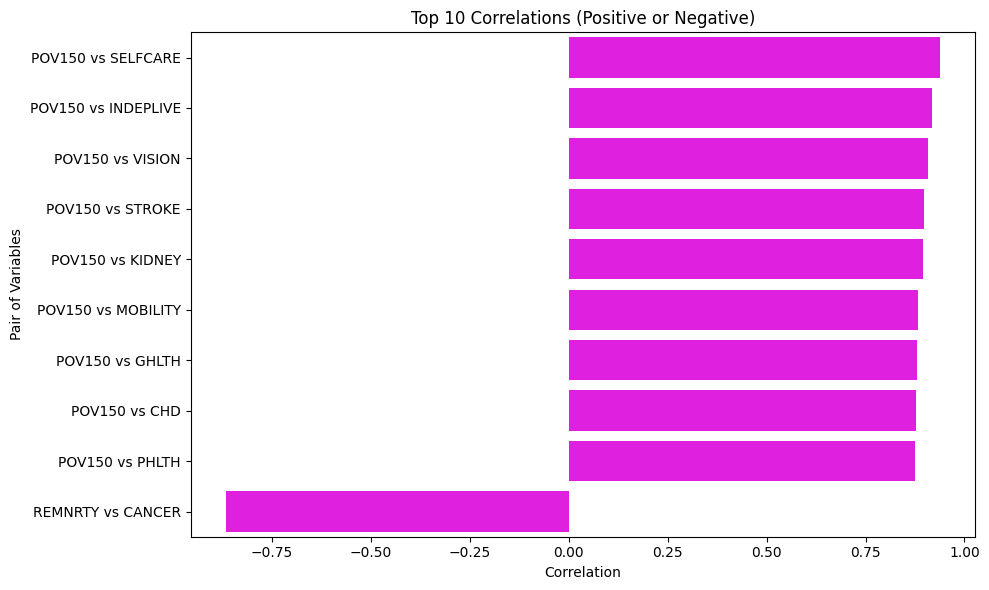

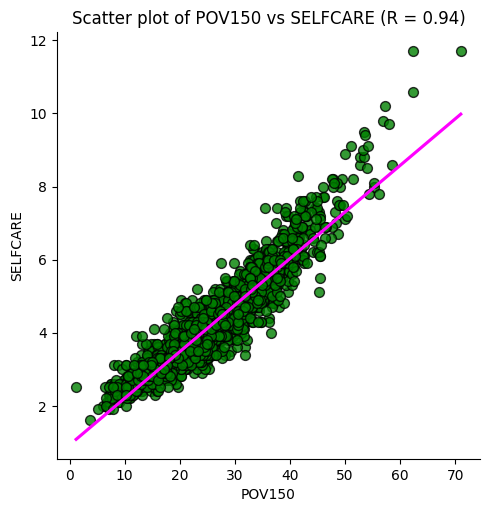


Top 10 Highest Negative Correlations:
                  Pair  Correlation  abs_corr
159  REMNRTY vs CANCER    -0.865038  0.865038
135   POV150 vs DENTAL    -0.786584  0.786584
104   NOHSDP vs DENTAL    -0.752744  0.752744
11     BROAD vs DENTAL    -0.630112  0.630112
125    POV150 vs BINGE    -0.568558  0.568558
133    POV150 vs COREW    -0.563635  0.563635
97    NOHSDP vs CANCER    -0.533278  0.533278
102    NOHSDP vs COREW    -0.515512  0.515512
132    POV150 vs COREM    -0.509307  0.509307
94     NOHSDP vs BINGE    -0.508078  0.508078


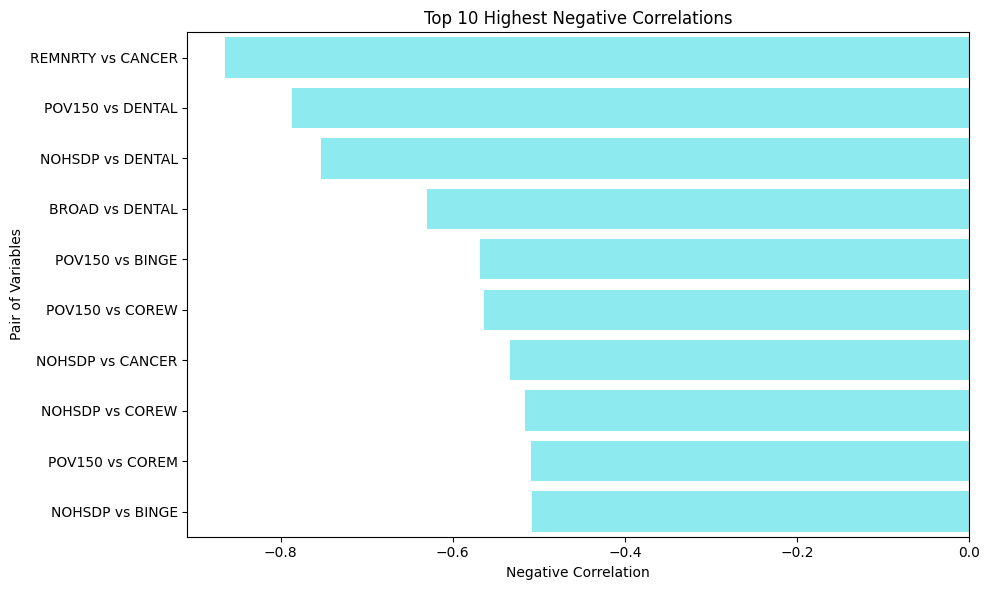

In [28]:
# List of social determinants of health
social_determinants = [
    'BROAD', 'CROWD', 'HCOST', 'NOHSDP', 'POV150', 'REMNRTY', 'SNGPNT', 'UNEMP',
    'Total_Housing_Units', 'Residing_in_Group_Quarters'
]

# List of health concerns or diseases
health_concerns = [
    'ARTHRITIS', 'BINGE', 'BPHIGH', 'BPMED', 'CANCER', 'CASTHMA', 'CHD', 'COPD', 'COREM', 'COREW',
    'CSMOKING', 'DENTAL', 'DEPRESSION', 'DIABETES', 'GHLTH', 'HIGHCHOL', 'KIDNEY', 'LPA', 'MHLTH',
    'OBESITY', 'PHLTH', 'SLEEP', 'STROKE', 'TEETHLOST', 'HEARING', 'VISION', 'COGNITION', 'MOBILITY',
    'SELFCARE', 'INDEPLIVE', 'DISABILITY'
]

# Call the function with your DataFrame (replace 'joined_df' with your actual DataFrame)
correlation_df = calculate_correlations(joined_df, social_determinants, health_concerns)

10 Strongest Correlations (Positive or Negative):
                                   Pair  Correlation
277   Low_Income_Half_Mile vs INDEPLIVE     0.826557
268       Low_Income_Half_Mile vs PHLTH     0.812193
274   Low_Income_Half_Mile vs COGNITION     0.811168
254         Low_Income_Half_Mile vs CHD     0.810643
275    Low_Income_Half_Mile vs MOBILITY     0.805490
271   Low_Income_Half_Mile vs TEETHLOST     0.804450
270      Low_Income_Half_Mile vs STROKE     0.792466
276    Low_Income_Half_Mile vs SELFCARE     0.789198
278  Low_Income_Half_Mile vs DISABILITY     0.788572
262       Low_Income_Half_Mile vs GHLTH     0.783908

10 Weakest Correlations:
                                 Pair  Correlation
315    Low_Income_10_Miles vs CASTHMA     0.000107
575           Seniors_10_Miles vs LPA    -0.000756
237        Children_20_Miles vs PHLTH     0.001250
524     Seniors_Half_Mile vs SELFCARE     0.001476
600        Seniors_20_Miles vs DENTAL    -0.002221
351   Low_Income_20_Miles vs CSMOKI

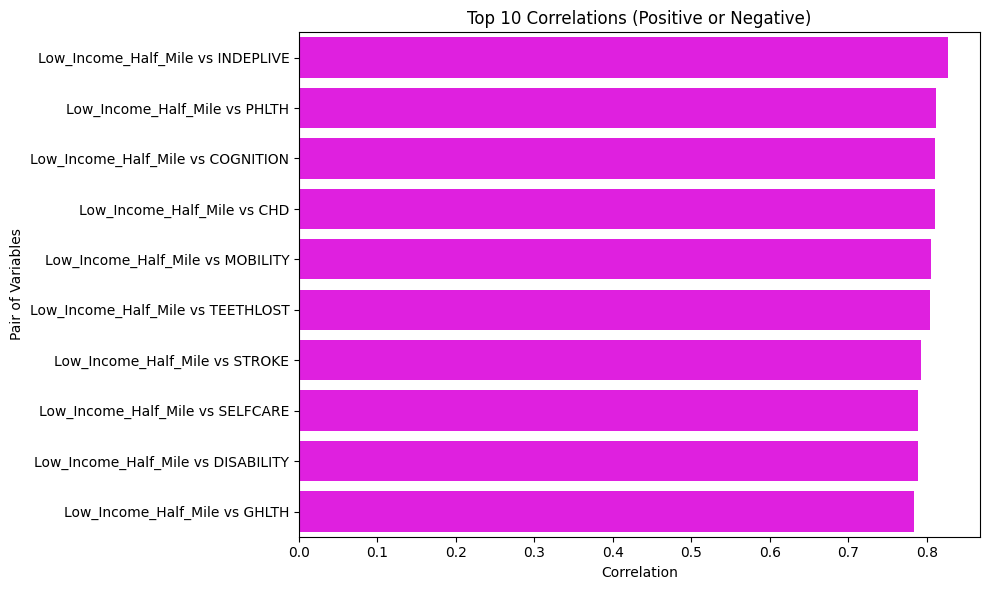

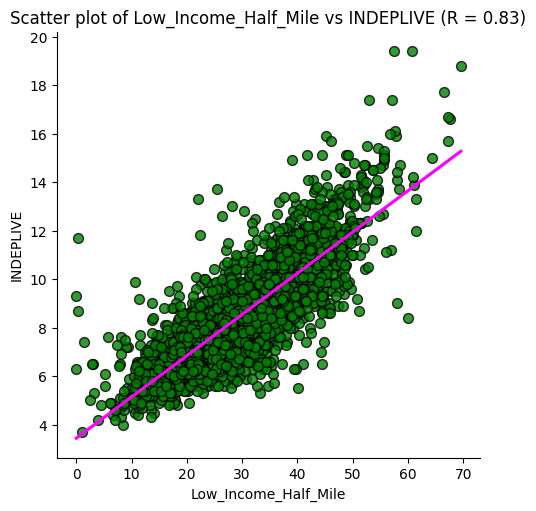


Top 10 Highest Negative Correlations:
                               Pair  Correlation  abs_corr
259  Low_Income_Half_Mile vs DENTAL    -0.732625  0.732625
290     Low_Income_1_Mile vs DENTAL    -0.613549  0.613549
249   Low_Income_Half_Mile vs BINGE    -0.523113  0.523113
257   Low_Income_Half_Mile vs COREW    -0.465940  0.465940
256   Low_Income_Half_Mile vs COREM    -0.398940  0.398940
280      Low_Income_1_Mile vs BINGE    -0.395179  0.395179
42      No_Vehicle_1_Mile vs DENTAL    -0.391396  0.391396
11   No_Vehicle_Half_Mile vs DENTAL    -0.388544  0.388544
288      Low_Income_1_Mile vs COREW    -0.388464  0.388464
287      Low_Income_1_Mile vs COREM    -0.321915  0.321915


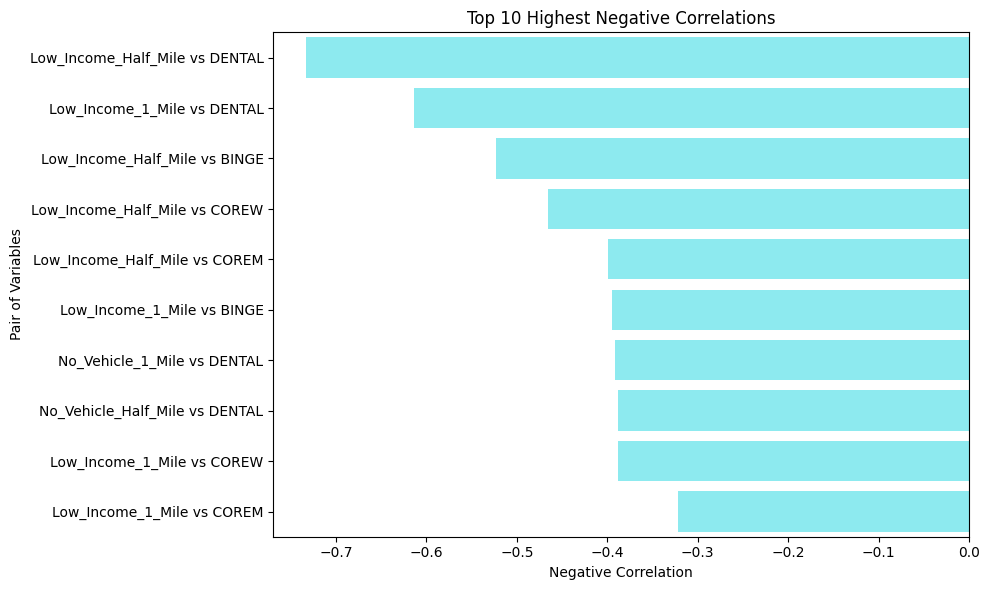

In [29]:
# List of food access
food_access = [
    'No_Vehicle_Half_Mile', 'No_Vehicle_1_Mile',
    'No_Vehicle_10_Miles', 'No_Vehicle_20_Miles', 'Children_Half_Mile', 'Children_1_Mile',
    'Children_10_Miles', 'Children_20_Miles', 'Low_Income_Half_Mile', 'Low_Income_1_Mile',
    'Low_Income_10_Miles', 'Low_Income_20_Miles', 'Population_Half_Mile', 'Population_1_Mile',
    'Population_10_Miles', 'Population_20_Miles', 'Seniors_Half_Mile', 'Seniors_1_Mile',
    'Seniors_10_Miles', 'Seniors_20_Miles'
]

# List of health concerns or diseases
health_concerns = [
    'ARTHRITIS', 'BINGE', 'BPHIGH', 'BPMED', 'CANCER', 'CASTHMA', 'CHD', 'COPD', 'COREM', 'COREW',
    'CSMOKING', 'DENTAL', 'DEPRESSION', 'DIABETES', 'GHLTH', 'HIGHCHOL', 'KIDNEY', 'LPA', 'MHLTH',
    'OBESITY', 'PHLTH', 'SLEEP', 'STROKE', 'TEETHLOST', 'HEARING', 'VISION', 'COGNITION', 'MOBILITY',
    'SELFCARE', 'INDEPLIVE', 'DISABILITY'
]

# Call the function with your DataFrame (replace 'joined_df' with your actual DataFrame)
correlation_df = calculate_correlations(joined_df, food_access, health_concerns)

10 Strongest Correlations (Positive or Negative):
                      Pair  Correlation
34        CHECKUP vs BPMED     0.760863
102  COLON_SCREEN vs COREW     0.691033
11      CERVICAL vs DENTAL     0.669812
101  COLON_SCREEN vs COREM     0.632295
24     CERVICAL vs HEARING    -0.627627
9        CERVICAL vs COREW     0.616072
133      MAMMOUSE vs COREW     0.611503
33       CHECKUP vs BPHIGH     0.582940
20       CERVICAL vs PHLTH    -0.579280
148    MAMMOUSE vs HEARING    -0.577240

10 Weakest Correlations:
                         Pair  Correlation
74   CHOLSCREEN vs DEPRESSION     0.002215
139      MAMMOUSE vs HIGHCHOL     0.004487
98    COLON_SCREEN vs CASTHMA    -0.016736
128        MAMMOUSE vs CANCER     0.018214
145         MAMMOUSE vs SLEEP     0.019964
94      COLON_SCREEN vs BINGE     0.028537
126        MAMMOUSE vs BPHIGH    -0.029036
62    CHOLSCREEN vs ARTHRITIS     0.033201
75     CHOLSCREEN vs DIABETES     0.034940
3           CERVICAL vs BPMED     0.038984


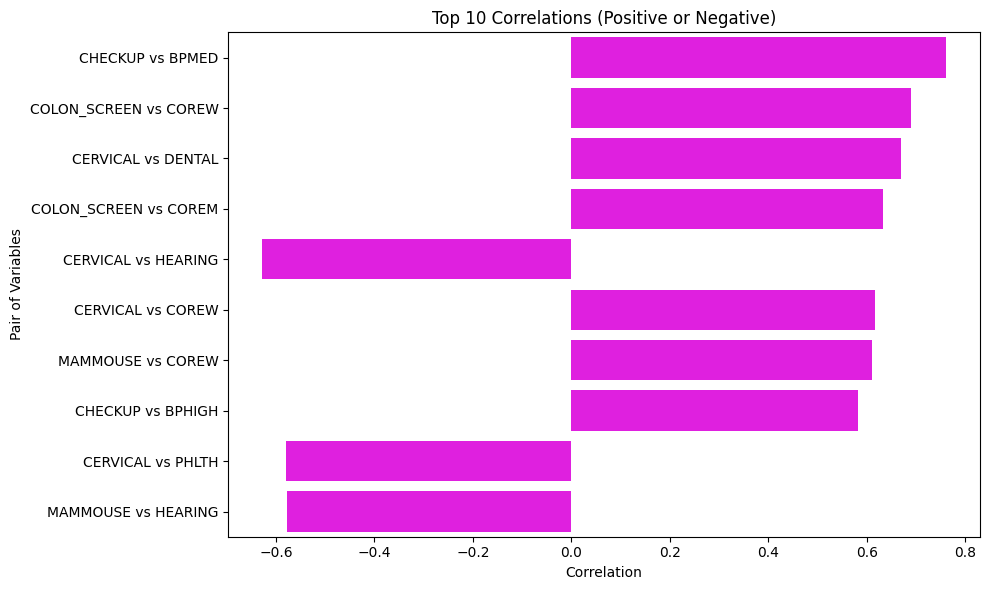

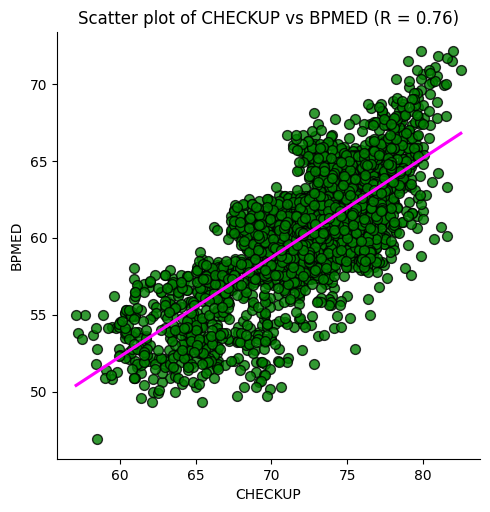


Top 10 Highest Negative Correlations:
                       Pair  Correlation  abs_corr
24      CERVICAL vs HEARING    -0.627627  0.627627
20        CERVICAL vs PHLTH    -0.579280  0.579280
148     MAMMOUSE vs HEARING    -0.577240  0.577240
14        CERVICAL vs GHLTH    -0.563971  0.563971
30   CERVICAL vs DISABILITY    -0.541117  0.541117
25       CERVICAL vs VISION    -0.525023  0.525023
23    CERVICAL vs TEETHLOST    -0.524930  0.524930
26    CERVICAL vs COGNITION    -0.521228  0.521228
6           CERVICAL vs CHD    -0.514488  0.514488
17          CERVICAL vs LPA    -0.502824  0.502824


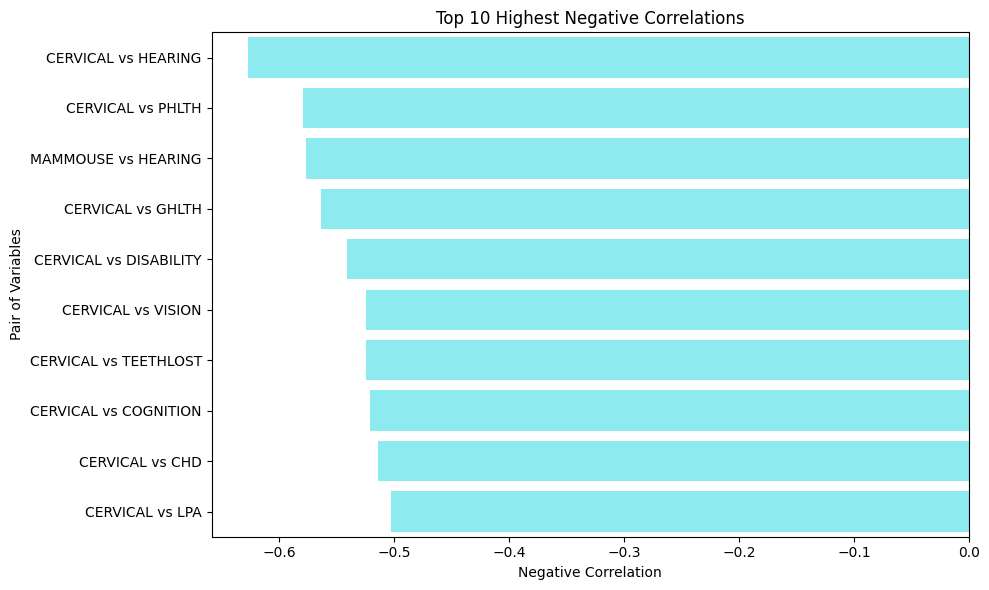

In [30]:
# List of screening and checkup-related columns
screening_checkups = [
    'CERVICAL', 'CHECKUP', 'CHOLSCREEN', 'COLON_SCREEN', 'MAMMOUSE'
]

# List of health concerns or diseases
health_concerns = [
    'ARTHRITIS', 'BINGE', 'BPHIGH', 'BPMED', 'CANCER', 'CASTHMA', 'CHD', 'COPD', 'COREM', 'COREW',
    'CSMOKING', 'DENTAL', 'DEPRESSION', 'DIABETES', 'GHLTH', 'HIGHCHOL', 'KIDNEY', 'LPA', 'MHLTH',
    'OBESITY', 'PHLTH', 'SLEEP', 'STROKE', 'TEETHLOST', 'HEARING', 'VISION', 'COGNITION', 'MOBILITY',
    'SELFCARE', 'INDEPLIVE', 'DISABILITY'
]

# Call the function with your DataFrame (replace 'joined_df' with your actual DataFrame)
correlation_df = calculate_correlations(joined_df, screening_checkups, health_concerns)

10 Strongest Correlations (Positive or Negative):
                      Pair  Correlation
3       CERVICAL vs NOHSDP    -0.511206
4       CERVICAL vs POV150    -0.489667
33  COLON_SCREEN vs NOHSDP    -0.393859
0        CERVICAL vs BROAD    -0.389234
34  COLON_SCREEN vs POV150    -0.372206
1        CERVICAL vs CROWD    -0.370167
31   COLON_SCREEN vs CROWD    -0.362426
30   COLON_SCREEN vs BROAD    -0.324758
41       MAMMOUSE vs CROWD    -0.293665
44      MAMMOUSE vs POV150    -0.289866

10 Weakest Correlations:
                                          Pair  Correlation
45                         MAMMOUSE vs REMNRTY     0.004074
15                          CHECKUP vs REMNRTY    -0.004839
49      MAMMOUSE vs Residing_in_Group_Quarters    -0.009989
27                         CHOLSCREEN vs UNEMP     0.021701
19       CHECKUP vs Residing_in_Group_Quarters     0.023306
29    CHOLSCREEN vs Residing_in_Group_Quarters    -0.026817
23                        CHOLSCREEN vs NOHSDP    -0.028941
18  

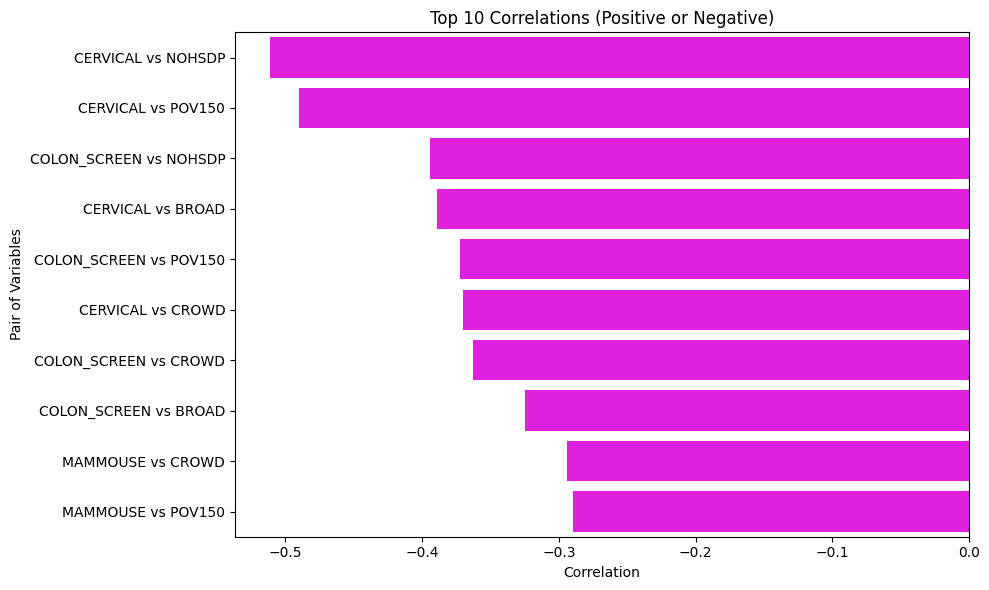

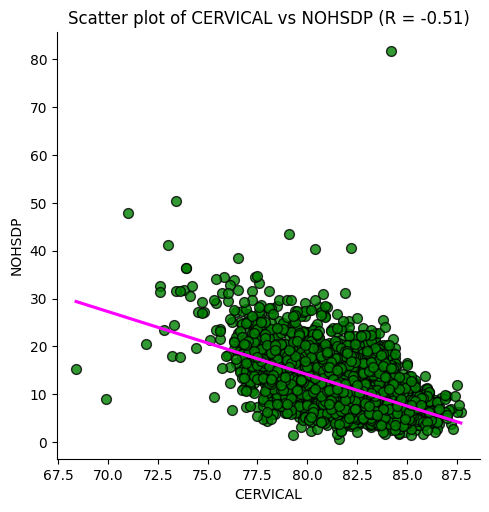


Top 10 Highest Negative Correlations:
                      Pair  Correlation  abs_corr
3       CERVICAL vs NOHSDP    -0.511206  0.511206
4       CERVICAL vs POV150    -0.489667  0.489667
33  COLON_SCREEN vs NOHSDP    -0.393859  0.393859
0        CERVICAL vs BROAD    -0.389234  0.389234
34  COLON_SCREEN vs POV150    -0.372206  0.372206
1        CERVICAL vs CROWD    -0.370167  0.370167
31   COLON_SCREEN vs CROWD    -0.362426  0.362426
30   COLON_SCREEN vs BROAD    -0.324758  0.324758
41       MAMMOUSE vs CROWD    -0.293665  0.293665
44      MAMMOUSE vs POV150    -0.289866  0.289866


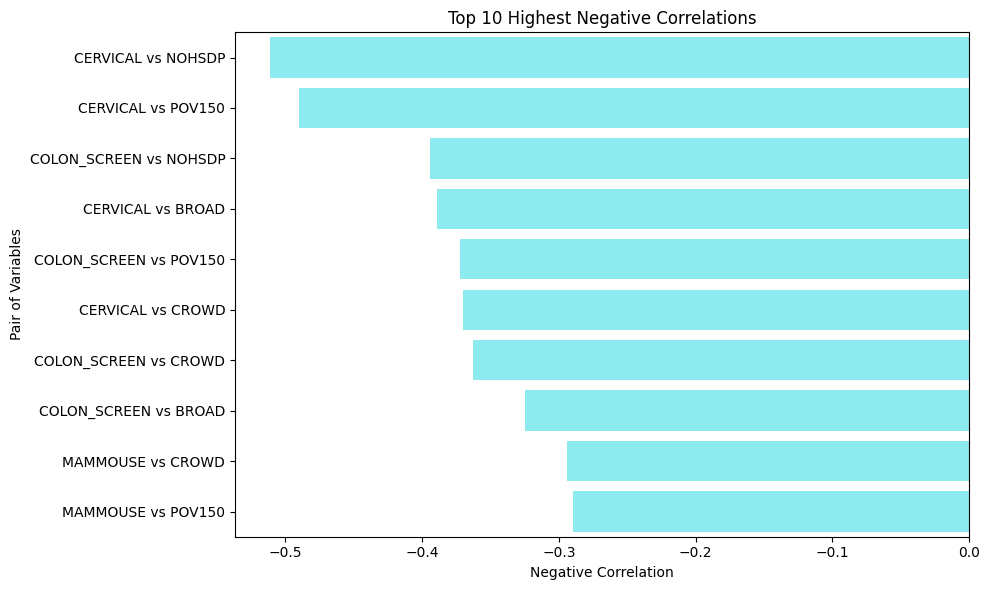

In [31]:
# List of screening and checkup-related columns
screening_checkups = [
    'CERVICAL', 'CHECKUP', 'CHOLSCREEN', 'COLON_SCREEN', 'MAMMOUSE'
]

# List of social determinants
social_determinants = [
    'BROAD', 'CROWD', 'HCOST', 'NOHSDP', 'POV150', 'REMNRTY', 'SNGPNT', 'UNEMP',
    'Total_Housing_Units', 'Residing_in_Group_Quarters'
]

# Call the function with your DataFrame (replace 'joined_df' with your actual DataFrame)
correlation_df = calculate_correlations(joined_df, screening_checkups, social_determinants)

10 Strongest Correlations (Positive or Negative):
                                    Pair  Correlation
8       CERVICAL vs Low_Income_Half_Mile    -0.415335
9          CERVICAL vs Low_Income_1_Mile    -0.330322
46       CHOLSCREEN vs Children_10_Miles    -0.304817
50     CHOLSCREEN vs Low_Income_10_Miles    -0.300564
54     CHOLSCREEN vs Population_10_Miles    -0.296484
70   COLON_SCREEN vs Low_Income_10_Miles    -0.294987
68  COLON_SCREEN vs Low_Income_Half_Mile    -0.285902
88      MAMMOUSE vs Low_Income_Half_Mile    -0.278215
89         MAMMOUSE vs Low_Income_1_Mile    -0.273591
28       CHECKUP vs Low_Income_Half_Mile     0.269836

10 Weakest Correlations:
                                    Pair  Correlation
36          CHECKUP vs Seniors_Half_Mile     0.004050
52    CHOLSCREEN vs Population_Half_Mile    -0.004555
73     COLON_SCREEN vs Population_1_Mile    -0.010826
37             CHECKUP vs Seniors_1_Mile     0.017146
44      CHOLSCREEN vs Children_Half_Mile    -0.022830
60  CO

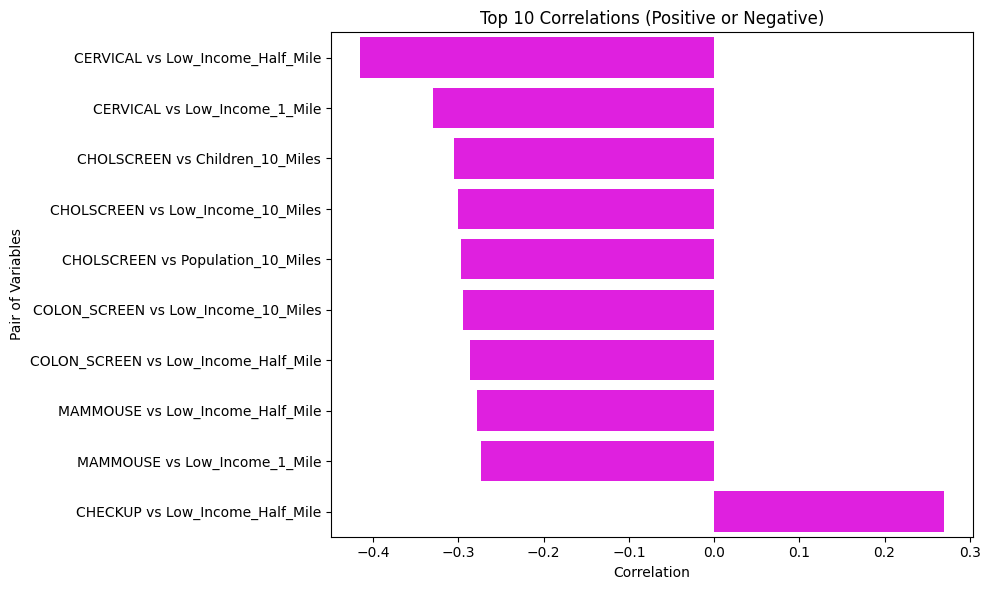

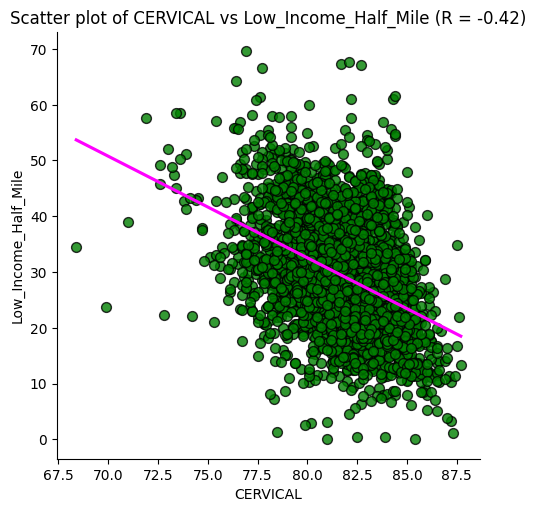


Top 10 Highest Negative Correlations:
                                    Pair  Correlation  abs_corr
8       CERVICAL vs Low_Income_Half_Mile    -0.415335  0.415335
9          CERVICAL vs Low_Income_1_Mile    -0.330322  0.330322
46       CHOLSCREEN vs Children_10_Miles    -0.304817  0.304817
50     CHOLSCREEN vs Low_Income_10_Miles    -0.300564  0.300564
54     CHOLSCREEN vs Population_10_Miles    -0.296484  0.296484
70   COLON_SCREEN vs Low_Income_10_Miles    -0.294987  0.294987
68  COLON_SCREEN vs Low_Income_Half_Mile    -0.285902  0.285902
88      MAMMOUSE vs Low_Income_Half_Mile    -0.278215  0.278215
89         MAMMOUSE vs Low_Income_1_Mile    -0.273591  0.273591
90       MAMMOUSE vs Low_Income_10_Miles    -0.265914  0.265914


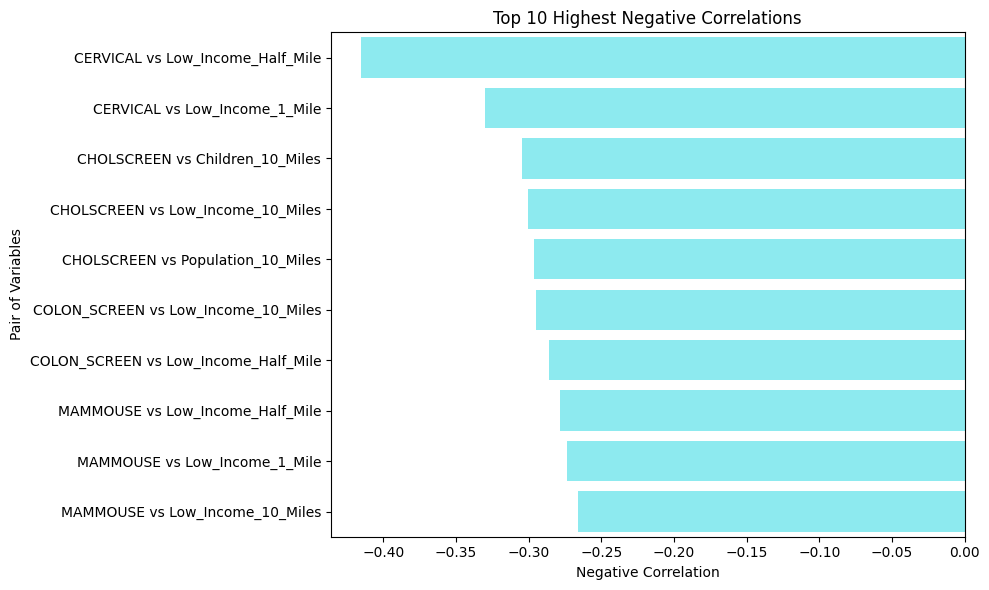

In [32]:
# List of screening and checkup-related columns
screening_checkups = [
    'CERVICAL', 'CHECKUP', 'CHOLSCREEN', 'COLON_SCREEN', 'MAMMOUSE'
]

# List of food access
food_access = [
    'No_Vehicle_Half_Mile', 'No_Vehicle_1_Mile',
    'No_Vehicle_10_Miles', 'No_Vehicle_20_Miles', 'Children_Half_Mile', 'Children_1_Mile',
    'Children_10_Miles', 'Children_20_Miles', 'Low_Income_Half_Mile', 'Low_Income_1_Mile',
    'Low_Income_10_Miles', 'Low_Income_20_Miles', 'Population_Half_Mile', 'Population_1_Mile',
    'Population_10_Miles', 'Population_20_Miles', 'Seniors_Half_Mile', 'Seniors_1_Mile',
    'Seniors_10_Miles', 'Seniors_20_Miles'
]

# Call the function with your DataFrame (replace 'joined_df' with your actual DataFrame)
correlation_df = calculate_correlations(joined_df, screening_checkups, food_access)

                      Feature        VIF
4                      POV150  29.870483
0                       BROAD  13.144014
2                       HCOST  12.242866
6                      SNGPNT  11.087698
3                      NOHSDP  10.425348
7                       UNEMP   7.523886
5                     REMNRTY   5.004775
1                       CROWD   2.671960
9  Residing_in_Group_Quarters   1.668267
8         Total_Housing_Units   1.370490


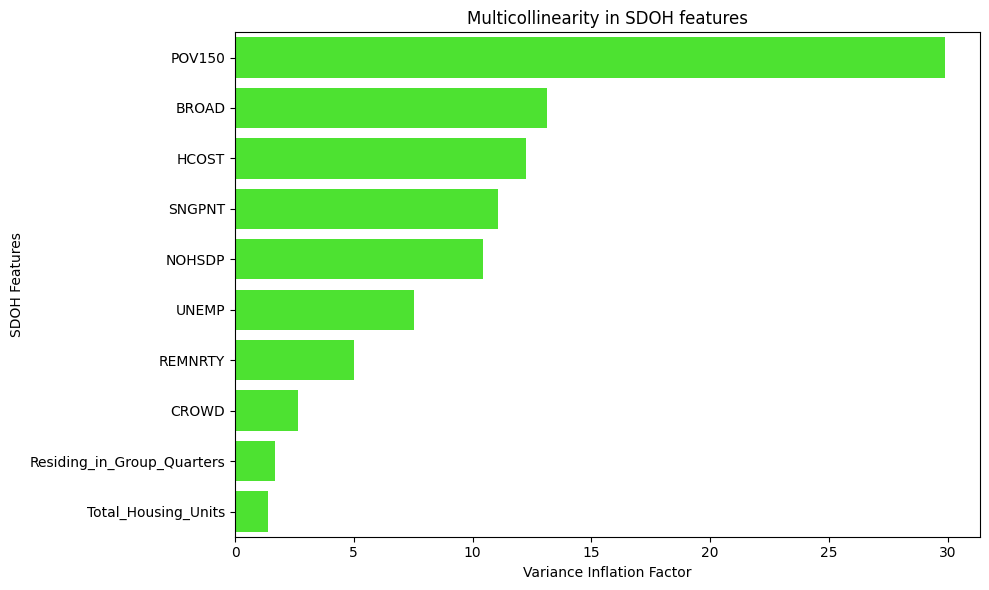

In [33]:
def calculate_vif(df, features):
    """
    This function calculates the Variance Inflation Factor (VIF) for each feature in the DataFrame.

    Args:
    df (pd.DataFrame): The DataFrame containing the data.
    features (list): List of features (columns) to calculate VIF for.

    Returns:
    pd.DataFrame: A DataFrame with features and their corresponding VIF values.
    """
    # Create a DataFrame containing only the features we want to analyze
    X = df[features].dropna()  # Drop rows with missing values, as VIF can't handle them

    # Initialize an empty DataFrame to store VIF values
    vif_data = pd.DataFrame()
    vif_data['Feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Sort the VIF DataFrame in descending order
    vif_data = vif_data.sort_values(by='VIF', ascending=False)

    return vif_data

# List of social determinants of health (SDOH) features
sdoh_features = [
    'BROAD', 'CROWD', 'HCOST', 'NOHSDP', 'POV150', 'REMNRTY', 'SNGPNT', 'UNEMP',
    'Total_Housing_Units', 'Residing_in_Group_Quarters'
]

# Call the function to calculate VIF for SDOH features
vif_df = calculate_vif(joined_df, sdoh_features)

# Display the VIF results
print(vif_df)

# Bar plot for the top 10 correlations
plt.figure(figsize=(10, 6))
sns.barplot(x='VIF', y='Feature', data=vif_df, color='#39FF14')
plt.title('Multicollinearity in SDOH features')
plt.xlabel('Variance Inflation Factor')
plt.ylabel('SDOH Features')
plt.tight_layout()
plt.show()